# Practice to rewrite the formulas in this paper
Imaging surface analysis: Lateral resolution and its relation to contrast and
noise

Mathias Senoner,* Thomas Wirth and Wolfgang E. S. Unger
Received 16th March 2010, Accepted 13th May 2010
DOI: 10.1039/c004323k

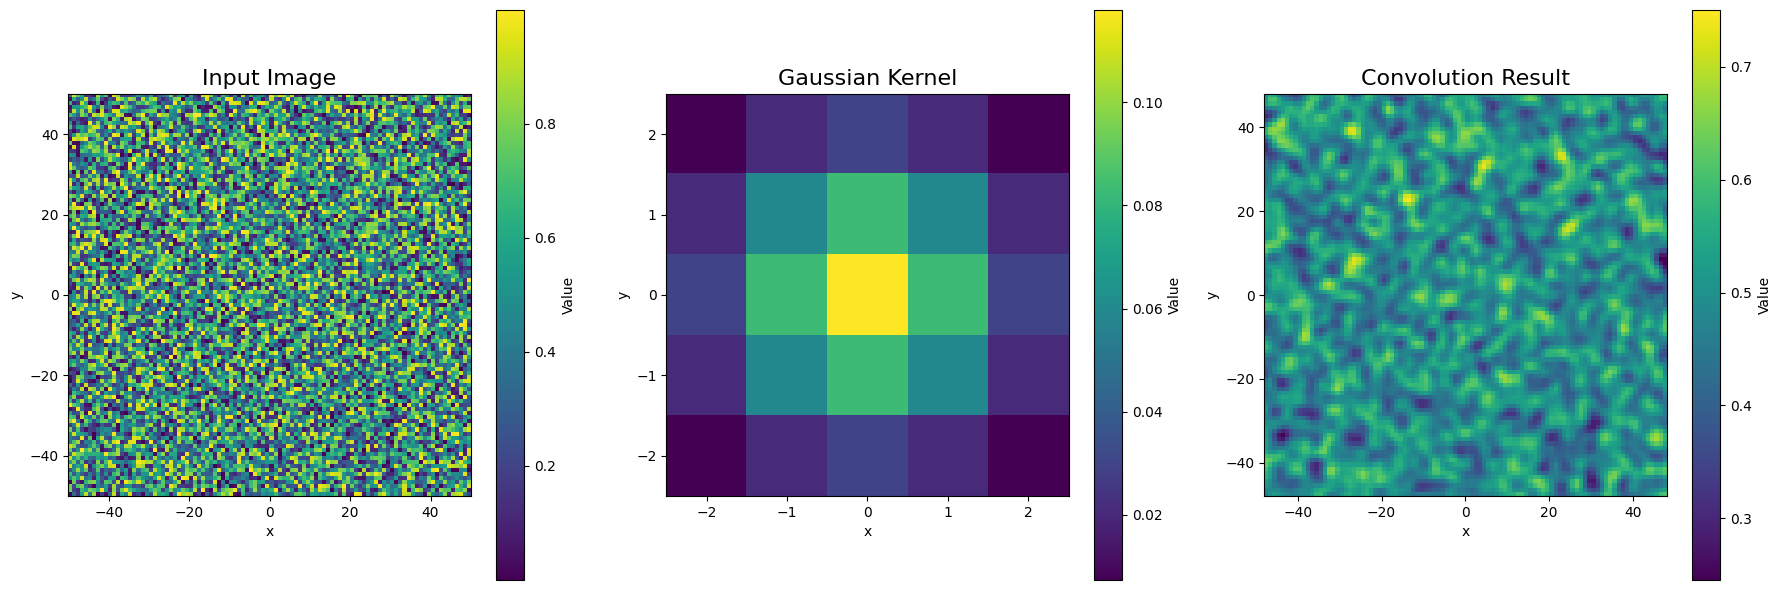

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel_2d(size, sigma):
    x = np.linspace(-size/2, size/2, size)
    y = np.linspace(-size/2, size/2, size)
    X, Y = np.meshgrid(x, y)
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return kernel / np.sum(kernel) # Normalized

def convolve_2d(image, kernel):
    shape = (image.shape[0] - kernel.shape[0] + 1, image.shape[1] - kernel.shape[1] + 1) + kernel.shape
    strides = image.strides * 2
    strided_image = np.lib.stride_tricks.as_strided(image, shape, strides)
    return np.einsum('kl, ijkl->ij', kernel, strided_image)

# Set parameters
np.random.seed(42)
image_size = 100
image = np.random.rand(image_size, image_size)
kernel_size = 5
sigma = 1.5
kernel = gaussian_kernel_2d(kernel_size, sigma)
result = convolve_2d(image, kernel)

# Set Center of the figures 
image_extent = (-image.shape[1] // 2, image.shape[1] // 2, -image.shape[0] // 2, image.shape[0] // 2)
kernel_extent = (-kernel_size/2, kernel_size/2, -kernel_size/2, kernel_size/2)
result_extent = (-result.shape[1] // 2, result.shape[1] // 2, -result.shape[0] // 2, result.shape[0] // 2)

# Plot figures
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Input image
img_input = axes[0].imshow(image, extent=image_extent, cmap='viridis', interpolation='none')
axes[0].set_title("Input Image", fontsize=16)
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
fig.colorbar(img_input, ax=axes[0], label="Value")

# Kernel
img_kernel = axes[1].imshow(kernel, extent=kernel_extent, cmap='viridis', interpolation='none')
axes[1].set_title("Gaussian Kernel", fontsize=16)
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
fig.colorbar(img_kernel, ax=axes[1], label="Value")

# Convolutoin result
img_result = axes[2].imshow(result, extent=result_extent, cmap='viridis', interpolation='none')
axes[2].set_title("Convolution Result", fontsize=16)
axes[2].set_xlabel("x")
axes[2].set_ylabel("y")
fig.colorbar(img_result, ax=axes[2], label="Value")

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def Gaussian(X, Y, sigma):
    result = (1 / (2 * np.pi * sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return result

def G_f(x_size, y_size, x_data_amount, y_data_amount, sigma):
    x = np.linspace(-x_size / 2, x_size / 2, x_data_amount)
    y = np.linspace(-y_size / 2, y_size / 2, y_data_amount)
    X, Y = np.meshgrid(x, y)
    matrix = Gaussian(X, Y, sigma)
    # normalized
    matrix_sum = np.sum(matrix)
    normalized_matrix = matrix / matrix_sum
    return normalized_matrix

def X_cut(G_matrix, y_index):
    return G_matrix[:, y_index]

# Set parameter
x_size = 5
y_size = 5
x_data_amount = 10
y_data_amount = 10
sigma = 2/2.35 #半値幅2eV
y_index = 2

#ガウス関数の畳み込み行列
G_matrix = G_f(x_size, y_size, x_data_amount, y_data_amount, sigma)
print(f"ガウス関数の畳み込み行列{G_matrix.shape}\n{G_matrix}\n")
print(f"行列の第{y_index}列：\n{X_cut(G_matrix, y_index)}")


ガウス関数の畳み込み行列(10, 10)
[[1.21518404e-05 6.68168932e-05 2.39921653e-04 5.62589412e-04
  8.61494700e-04 8.61494700e-04 5.62589412e-04 2.39921653e-04
  6.68168932e-05 1.21518404e-05]
 [6.68168932e-05 3.67392680e-04 1.31920918e-03 3.09339782e-03
  4.73692852e-03 4.73692852e-03 3.09339782e-03 1.31920918e-03
  3.67392680e-04 6.68168932e-05]
 [2.39921653e-04 1.31920918e-03 4.73692852e-03 1.11075670e-02
  1.70090476e-02 1.70090476e-02 1.11075670e-02 4.73692852e-03
  1.31920918e-03 2.39921653e-04]
 [5.62589412e-04 3.09339782e-03 1.11075670e-02 2.60460010e-02
  3.98843122e-02 3.98843122e-02 2.60460010e-02 1.11075670e-02
  3.09339782e-03 5.62589412e-04]
 [8.61494700e-04 4.73692852e-03 1.70090476e-02 3.98843122e-02
  6.10749560e-02 6.10749560e-02 3.98843122e-02 1.70090476e-02
  4.73692852e-03 8.61494700e-04]
 [8.61494700e-04 4.73692852e-03 1.70090476e-02 3.98843122e-02
  6.10749560e-02 6.10749560e-02 3.98843122e-02 1.70090476e-02
  4.73692852e-03 8.61494700e-04]
 [5.62589412e-04 3.09339782e-03 1.110

11/7

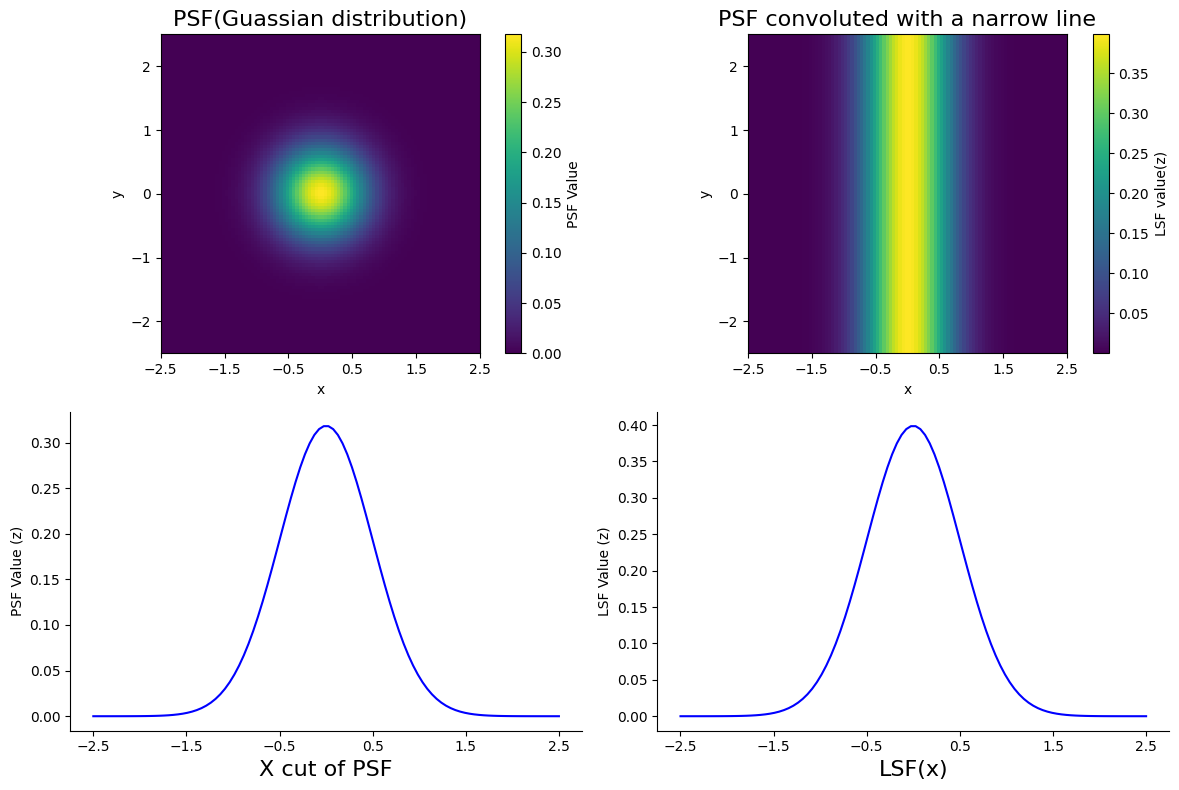

In [32]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Guassian distribution
def PSF_Guassian(x, y, sigma):
    result = np.exp(-(np.power(x, 2) + np.power(y, 2)) / (2 * np.power(sigma, 2))) / 2 / np.pi / np.sqrt(np.power(sigma, 2))
    return result

# integraded function (use scipy)
def LSF_Guassian(x, sigma):
    result, error = quad(lambda y: PSF_Guassian(x, y, sigma), -np.inf, np.inf)
    return result

# Set image size
side_length = 5 
data_amount_in_one_axes = 100

x = np.linspace(-side_length/2, side_length/2, data_amount_in_one_axes)  
y = np.linspace(-side_length/2, side_length/2, data_amount_in_one_axes)  
X, Y = np.meshgrid(x, y)

# start to plot figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
sigma = 0.5

# ax1: PSF's 2D image
# Count z value of each point
Z = PSF_Guassian(X, Y, sigma)
# Plot figure
im = ax1.imshow(Z, extent=(-side_length/2, side_length/2, -side_length/2, side_length/2), origin='lower', cmap='viridis')
fig.colorbar(im, ax=ax1, label="PSF Value")
ax1.set_title("PSF(Guassian distribution)", fontsize=16)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xticks(np.arange(-side_length/2, side_length/2 + 1, 1)) 

# ax2: PSF convoluted with a narrow line
# Count integraded_y
Z_integrated_y = np.array([LSF_Guassian(xi, sigma) for xi in x])
Z_integrated_y = np.tile(Z_integrated_y, (100, 1)) 
# Plot figure
im2 = ax2.imshow(Z_integrated_y, extent=(-side_length/2, side_length/2, -side_length/2, side_length/2), origin='lower', cmap='viridis')
fig.colorbar(im2, ax=ax2, label="LSF value(z)")
ax2.set_title("PSF convoluted with a narrow line", fontsize=16)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_xticks(np.arange(-side_length/2, side_length/2 + 1, 1)) 

# ax3: x cut of PSF (at y = 0)
# x cut of PSF (at y = 0)
z_slice = PSF_Guassian(x, 0, sigma)
# Plot figure
ax3.plot(x, z_slice, color='blue')
ax3.set_xlabel("X cut of PSF", fontsize=16)
ax3.set_ylabel("PSF Value (z)")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xticks(np.arange(-side_length/2, side_length/2 + 1, 1)) 

# ax4: LSF(x)（y=0）
Z_integrated_y_slice = np.array([LSF_Guassian(xi, sigma) for xi in x])
# Plot figure
ax4.plot(x, Z_integrated_y_slice, color='blue')
ax4.set_xlabel("LSF(x)", fontsize=16)
ax4.set_ylabel("LSF Value (z)")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xticks(np.arange(-side_length/2, side_length/2 + 1, 1)) 

plt.tight_layout()
plt.show()

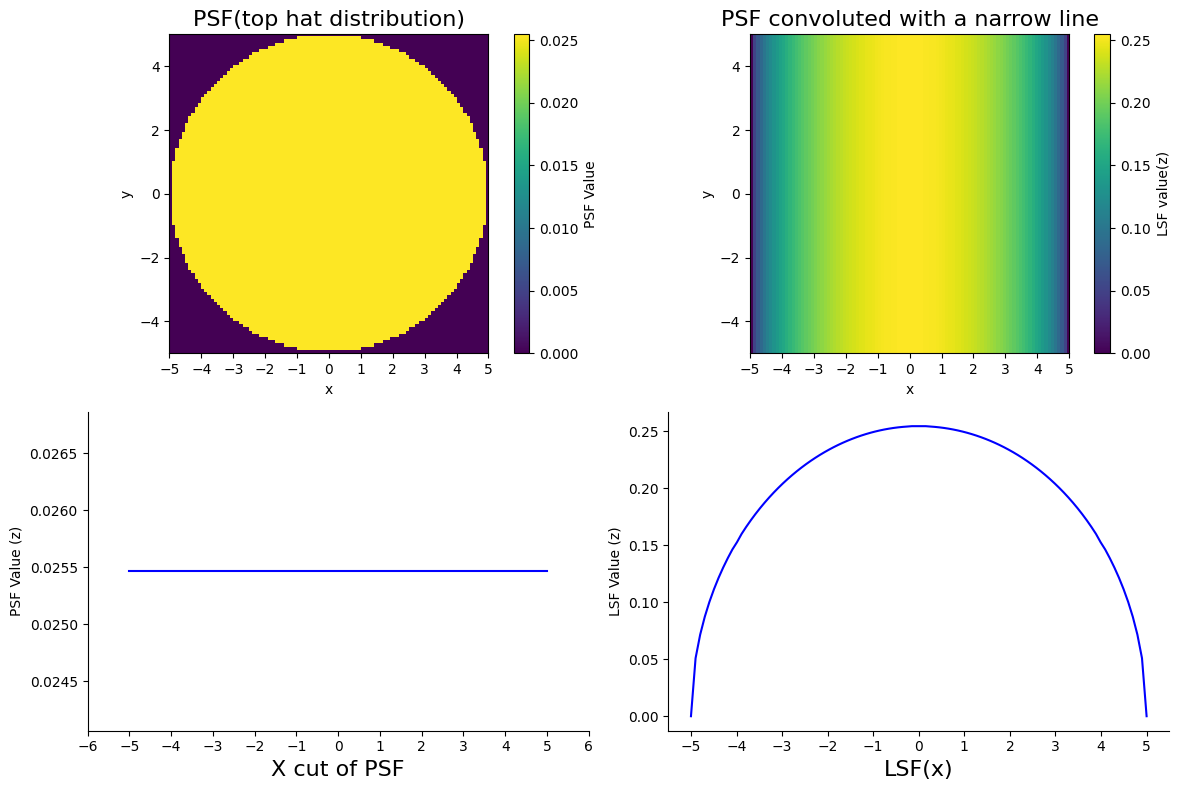

In [54]:
# top hat distribution
def PSF_top_hat(x, y):
    Z = np.where((x**2 + y**2) <= r**2, 1 / (np.pi * r**2 / 2), 0)
    return Z

# integraded function (use scipy)
def LSF_top_hat(x):
    result, error = quad(lambda y: PSF_top_hat(x, y), -np.inf, np.inf)
    return result

# Set image size
r = 5 
data_amount_in_one_axes = 100

x = np.linspace(-r, r, data_amount_in_one_axes)  
y = np.linspace(-r, r, data_amount_in_one_axes)  
X, Y = np.meshgrid(x, y)

# start to plot figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
sigma = 0.5

# ax1: PSF's 2D image
# Count z value of each point
Z = PSF_top_hat(X, Y)
# Plot figure
im = ax1.imshow(Z, extent=(-r, r, -r, r), origin='lower', cmap='viridis')
fig.colorbar(im, ax=ax1, label="PSF Value")
ax1.set_title("PSF(top hat distribution)", fontsize=16)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xticks(np.arange(-r, r + 1, 1)) 

# ax2: PSF convoluted with a narrow line
# Count integraded_y
Z_integrated_y = np.array([LSF_top_hat(xi) for xi in x])
Z_integrated_y = np.tile(Z_integrated_y, (100, 1)) 
# Plot figure
im2 = ax2.imshow(Z_integrated_y, extent=(-r, r, -r, r), origin='lower', cmap='viridis')
fig.colorbar(im2, ax=ax2, label="LSF value(z)")
ax2.set_title("PSF convoluted with a narrow line", fontsize=16)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_xticks(np.arange(-r, r + 1, 1)) 

# ax3: x cut of PSF (at y = 0)
# x cut of PSF (at y = 0)
z_slice = PSF_top_hat(x, 0)
# Plot figure
ax3.plot(x, z_slice, color='blue')
ax3.set_xlabel("X cut of PSF", fontsize=16)
ax3.set_ylabel("PSF Value (z)")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xticks(np.arange(-r - 1, r + 2, 1)) 

# ax4: LSF(x)（y=0）
Z_integrated_y_slice = np.array([LSF_top_hat(xi) for xi in x])
# Plot figure
ax4.plot(x, Z_integrated_y_slice, color='blue')
ax4.set_xlabel("LSF(x)", fontsize=16)
ax4.set_ylabel("LSF Value (z)")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xticks(np.arange(-r, r + 1, 1)) 

plt.tight_layout()
plt.show()